# Exercise 4.10 Pt 2

In [57]:
#1: Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 500)

In [2]:
path = r'/Users/miguel/Documents/Instacart Basket Analysis'

In [3]:
#1: Importing file
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_normal_activity.pkl'))

In [4]:
#5: Checking department_id column
df['department_id']

0           7
1           7
2           7
3           7
4           7
           ..
32434203    7
32434204    7
32434205    7
32434206    7
32434207    7
Name: department_id, Length: 30992664, dtype: int64

In [5]:
#5: Importing departments_wrangled dataframe
df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [6]:
#5: Checking output
df_dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [7]:
#5: Renaming column
df_dept.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [8]:
#5: Checking work
df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [10]:
#5: Merging data frames
df2 = df.merge(df_dept, on = 'department_id')

In [11]:
#5: Checking work
df2.head()

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Gender,State,Age,Date_Joined,number_of_dependants,Marital_Status,Income,Region,activity_flag,department
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity,beverages
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity,beverages
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity,beverages
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity,beverages
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity,beverages


In [12]:
#5: Checking min age to create age group profile
df2['Age'].min()

18

In [13]:
#5: Checking max age to create age group profile
df2['Age'].max()

81

In [14]:
#5: Creating age group 18 to 29
df2.loc[(df2['Age'] >= 18) & (df2['Age'] <= 29), 'age_group'] = '18-29 years old'

/var/folders/dr/00kxp8917rb28j9sc7qrmsqh0000gn/T/ipykernel_93506/4002990171.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '18-29 years old' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df2.loc[(df2['Age'] >= 18) & (df2['Age'] <= 29), 'age_group'] = '18-29 years old'


In [15]:
#5: Creating age group 30 to 44
df2.loc[(df2['Age'] >= 30) & (df2['Age'] <= 44), 'age_group'] = '30-44 years old'

In [16]:
#5: Creating age group 45 to 59
df2.loc[(df2['Age'] >= 45) & (df2['Age'] <= 59), 'age_group'] = '45-59 years old'

In [17]:
#5: Creating age group 60 and above
df2.loc[(df2['Age'] >= 60), 'age_group'] = '60+ years old '

In [19]:
#5: Checking work
df2.head()

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,State,Age,Date_Joined,number_of_dependants,Marital_Status,Income,Region,activity_flag,department,age_group
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,Normal activity,beverages,30-44 years old
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,Normal activity,beverages,30-44 years old
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,Normal activity,beverages,30-44 years old
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,Normal activity,beverages,30-44 years old
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,Normal activity,beverages,30-44 years old


In [20]:
#5: Checking work
df2['age_group'].value_counts(dropna= False)

age_group
60+ years old      10583941
45-59 years old     7318056
30-44 years old     7267646
18-29 years old     5823021
Name: count, dtype: int64

In [21]:
#5: Checking min income to create income group profile
df2['Income'].min()

25903

In [22]:
#5: Checking max income to create income group profile
df2['Income'].max()

593901

In [23]:
#5: Creating income group at or below $50k
df2.loc[(df2['Income'] <= 50000), 'income_group'] = 'lower_income'

/var/folders/dr/00kxp8917rb28j9sc7qrmsqh0000gn/T/ipykernel_93506/3640740950.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'lower_income' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df2.loc[(df2['Income'] <= 50000), 'income_group'] = 'lower_income'


In [24]:
#5: Creating income group between $50k and $100k
df2.loc[(df2['Income'] > 50000) & (df2['Income'] <= 100000), 'income_group'] = 'middle_income'

In [25]:
#5: Creating income group $100k+
df2.loc[(df2['Income'] > 100000), 'income_group'] = 'higher_income'

In [26]:
#5: Checking work
df2['income_group'].value_counts(dropna= False)

income_group
higher_income    14219044
middle_income    13407471
lower_income      3366149
Name: count, dtype: int64

In [27]:
#5: Checking work
df2.tail()

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Age,Date_Joined,number_of_dependants,Marital_Status,Income,Region,activity_flag,department,age_group,income_group
30992659,525976,58201,24,6,16,3.0,5161,1,1,Dried Mango,...,75,2/8/2019,2,married,138066,South,Normal activity,bulk,60+ years old,higher_income
30992660,758290,58201,26,0,12,9.0,5161,1,1,Dried Mango,...,75,2/8/2019,2,married,138066,South,Normal activity,bulk,60+ years old,higher_income
30992661,460711,58201,27,6,9,13.0,5161,1,1,Dried Mango,...,75,2/8/2019,2,married,138066,South,Normal activity,bulk,60+ years old,higher_income
30992662,1605789,58201,28,5,7,27.0,5161,1,1,Dried Mango,...,75,2/8/2019,2,married,138066,South,Normal activity,bulk,60+ years old,higher_income
30992663,1565024,152886,2,1,9,30.0,1000,3,0,Apricots,...,45,7/9/2017,1,married,41662,Northeast,Normal activity,bulk,45-59 years old,lower_income


In [28]:
#5: Checking min # of dependants to create # of dependants group profile
df2['number_of_dependants'].min()

0

In [29]:
#5: Checking max # of dependants to create # of dependants group profile
df2['number_of_dependants'].max()

3

In [30]:
#5: Checking number of dependants column count
df2['number_of_dependants'].value_counts(dropna= False)

number_of_dependants
3    7779452
0    7747032
2    7740199
1    7725981
Name: count, dtype: int64

In [31]:
#5: Creating # of dependants group 0 dependants
df2.loc[(df2['number_of_dependants'] < 1), 'dependants_group'] = 'no_dependants'

/var/folders/dr/00kxp8917rb28j9sc7qrmsqh0000gn/T/ipykernel_93506/3852506269.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'no_dependants' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df2.loc[(df2['number_of_dependants'] < 1), 'dependants_group'] = 'no_dependants'


In [32]:
#5: Creating # of dependants group 1 & 2 dependants
df2.loc[(df2['number_of_dependants'] > 0) & (df2['number_of_dependants'] <= 2), 'dependants_group'] = '1_or_2_dependants'

In [33]:
#5: Creating # of dependants group 3+ dependants
df2.loc[(df2['number_of_dependants'] > 2), 'dependants_group'] = '3+_dependants'

In [34]:
#5: Checking work
df2.head()

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Date_Joined,number_of_dependants,Marital_Status,Income,Region,activity_flag,department,age_group,income_group,dependants_group
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,2/17/2019,3,married,40423,South,Normal activity,beverages,30-44 years old,lower_income,3+_dependants
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,Normal activity,beverages,30-44 years old,lower_income,3+_dependants
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,Normal activity,beverages,30-44 years old,lower_income,3+_dependants
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,Normal activity,beverages,30-44 years old,lower_income,3+_dependants
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,Normal activity,beverages,30-44 years old,lower_income,3+_dependants


In [35]:
#5: Checking work
df2['dependants_group'].value_counts(dropna= False)

dependants_group
1_or_2_dependants    15466180
3+_dependants         7779452
no_dependants         7747032
Name: count, dtype: int64

In [36]:
#5: Checking values of marital status column to create family status flag
df2['Marital_Status'].value_counts()

Marital_Status
married                             21763021
single                               5099271
divorced/widowed                     2647761
living with parents and siblings     1482611
Name: count, dtype: int64

In [37]:
#5: Creating flag for family_status 
df2.loc[(df2['Marital_Status'] == 'married') & (df2['number_of_dependants'] == 0), 'family_status'] = 'Married_no_kids'
df2.loc[(df2['Marital_Status'] == 'married') & (df2['number_of_dependants'] >= 1), 'family_status'] = 'Married_kids'
df2.loc[(df2['Marital_Status'] == 'single') & (df2['number_of_dependants'] >= 1), 'family_status'] = 'Single_kids'
df2.loc[(df2['Marital_Status'] == 'single') & (df2['number_of_dependants'] == 0), 'family_status'] = 'Single_no_kids'
df2.loc[(df2['Marital_Status'] == 'divorced/widowed') & (df2['number_of_dependants'] == 0), 'family_status'] = 'Divorced/widowed_no_kids'
df2.loc[(df2['Marital_Status'] == 'divorced/widowed') & (df2['number_of_dependants'] >= 1), 'family_status'] = 'Divorced/widowed_kids'
df2.loc[(df2['Marital_Status'] == 'living with parents and siblings') & (df2['number_of_dependants'] == 0), 'family_status'] = 'Living_w_family_no_kids'
df2.loc[(df2['Marital_Status'] == 'living with parents and siblings') & (df2['number_of_dependants'] >= 1), 'family_status'] = 'Living_w_family_kids'

/var/folders/dr/00kxp8917rb28j9sc7qrmsqh0000gn/T/ipykernel_93506/4226063453.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Married_no_kids' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df2.loc[(df2['Marital_Status'] == 'married') & (df2['number_of_dependants'] == 0), 'family_status'] = 'Married_no_kids'


In [38]:
#5: Checking work
df2['family_status'].value_counts(dropna = False) 

family_status
Married_kids                21763021
Single_no_kids               5099271
Divorced/widowed_no_kids     2647761
Living_w_family_kids         1482611
Name: count, dtype: int64

In [39]:
#5: Checking work
df2.tail(20)

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,number_of_dependants,Marital_Status,Income,Region,activity_flag,department,age_group,income_group,dependants_group,family_status
30992644,894797,54815,2,6,9,9.0,5161,2,0,Dried Mango,...,0,single,54767,South,Normal activity,bulk,45-59 years old,middle_income,no_dependants,Single_no_kids
30992645,657075,54815,3,4,16,19.0,5161,2,1,Dried Mango,...,0,single,54767,South,Normal activity,bulk,45-59 years old,middle_income,no_dependants,Single_no_kids
30992646,803211,36038,3,2,15,21.0,5161,2,0,Dried Mango,...,3,married,33529,West,Normal activity,bulk,45-59 years old,lower_income,3+_dependants,Married_kids
30992647,2627282,36038,4,2,15,0.0,5161,1,1,Dried Mango,...,3,married,33529,West,Normal activity,bulk,45-59 years old,lower_income,3+_dependants,Married_kids
30992648,2013213,36038,5,4,16,30.0,5161,1,1,Dried Mango,...,3,married,33529,West,Normal activity,bulk,45-59 years old,lower_income,3+_dependants,Married_kids
30992649,3325962,36038,6,0,11,30.0,5161,1,1,Dried Mango,...,3,married,33529,West,Normal activity,bulk,45-59 years old,lower_income,3+_dependants,Married_kids
30992650,584249,36038,7,1,14,8.0,5161,1,1,Dried Mango,...,3,married,33529,West,Normal activity,bulk,45-59 years old,lower_income,3+_dependants,Married_kids
30992651,197986,36038,8,1,11,28.0,5161,1,1,Dried Mango,...,3,married,33529,West,Normal activity,bulk,45-59 years old,lower_income,3+_dependants,Married_kids
30992652,2790554,36038,9,0,14,27.0,5161,1,1,Dried Mango,...,3,married,33529,West,Normal activity,bulk,45-59 years old,lower_income,3+_dependants,Married_kids
30992653,1831023,68097,1,0,19,NaN,5161,1,0,Dried Mango,...,0,divorced/widowed,141707,West,Normal activity,bulk,60+ years old,higher_income,no_dependants,Divorced/widowed_no_kids


# Visualizations

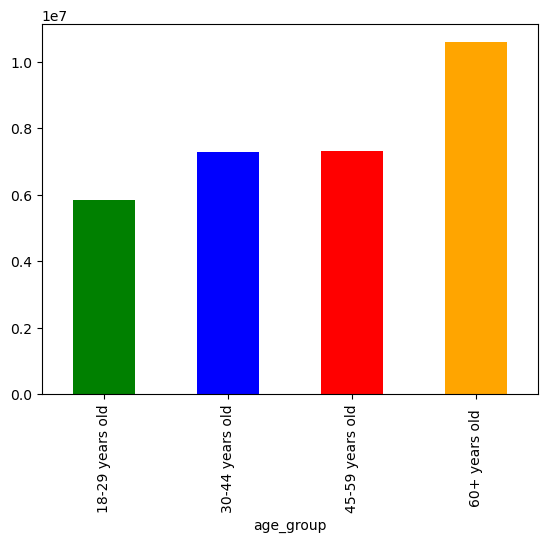

In [42]:
# Bar chart for number of customers by age group
bar_customers_by_age = df2['age_group'].value_counts().sort_index().plot.bar(color =['green', 'blue', 'red', 'orange'])

In [164]:
# Exporting bar chart for number of customers by age group
bar_customers_by_age.figure.savefig(path + 'bar_customers_by_age.png', bbox_inches='tight')

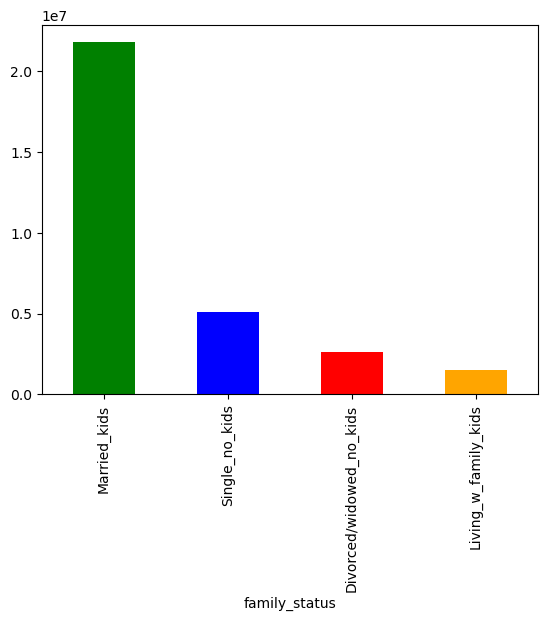

In [48]:
# Bar chart for number of customers by family status
bar_customers_fam_status = df2['family_status'].value_counts().plot.bar(color =['green', 'blue', 'red', 'orange'])

In [165]:
# Exporting bar chart for number of customers by family status
bar_customers_fam_status.figure.savefig(path + 'bar_customers_fam_status.png', bbox_inches='tight')

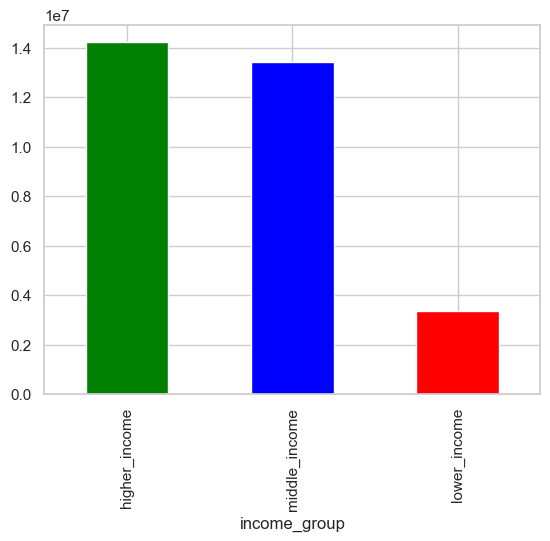

In [98]:
# Bar chart for number of customers by income group
bar_customers_income = df2['income_group'].value_counts().plot.bar(color =['green', 'blue', 'red'])

In [166]:
# Exporting bar chart for number of customers by income level
bar_customers_income.figure.savefig(path + 'bar_customers_income.png', bbox_inches='tight')

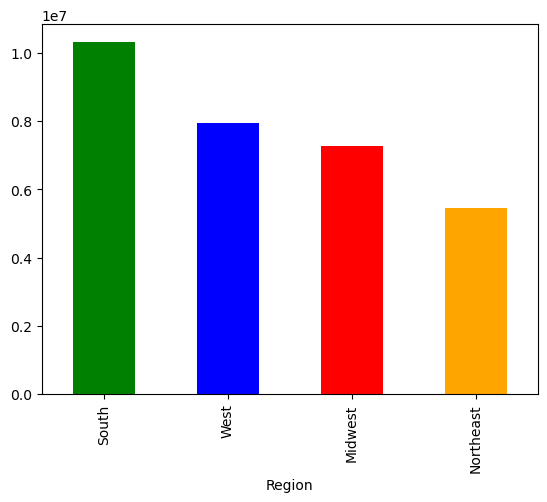

In [50]:
# Bar chart for number of customers by region
bar_customers_region = df2['Region'].value_counts().plot.bar(color =['green', 'blue', 'red', 'orange'])

In [163]:
# Exporting bar chart for number of customers by region
bar_customers_region.figure.savefig(path + 'bar_customers_region.png', bbox_inches='tight')

/var/folders/dr/00kxp8917rb28j9sc7qrmsqh0000gn/T/ipykernel_93506/2710514114.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region', y='prices', data=df2, ci=None, dodge=True, palette='Paired', saturation=0.75, width=0.6, estimator=sum)
/Users/miguel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/miguel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/miguel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future ve

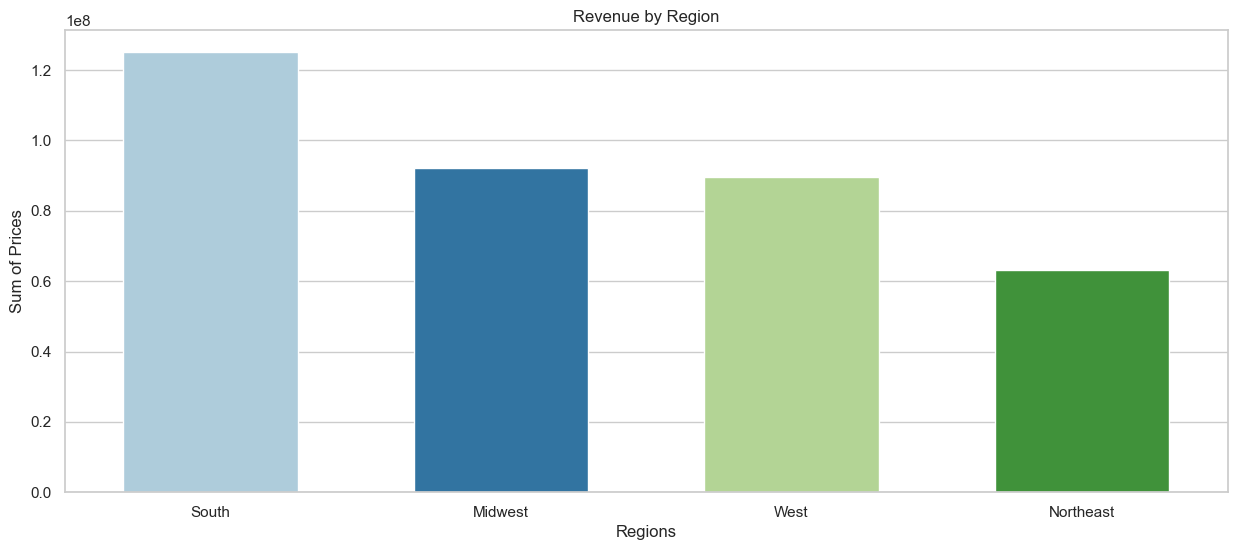

In [168]:
# Bar chart for revenue by region

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a bar plot using seaborn
plt.figure(figsize=(15, 6))
sns.barplot(x='Region', y='prices', data=df2, ci=None, dodge=True, palette='Paired', saturation=0.75, width=0.6, estimator=sum)

# Add labels and title
plt.xlabel('Regions')
plt.ylabel('Sum of Prices')
plt.title('Revenue by Region')

path = r'/Users/miguel/Documents/Instacart Basket Analysis'

# Exporting the plot as a PNG file
plt.savefig(path + 'bar_revenue_regions.png')

# Show the plot
plt.show()

In [55]:
df2['age_group'].value_counts()

age_group
60+ years old      10583941
45-59 years old     7318056
30-44 years old     7267646
18-29 years old     5823021
Name: count, dtype: int64

In [58]:
df2.head()

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,Busiest_Days,Busiest_Period_of_Day,max_order,loyalty_flag,average_price,spending_flag,median_days_since_order,order_frequency_flag,Gender,State,Age,Date_Joined,number_of_dependants,Marital_Status,Income,Region,activity_flag,department,age_group,income_group,dependants_group,family_status
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity,beverages,30-44 years old,lower_income,3+_dependants,Married_kids
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Slow days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity,beverages,30-44 years old,lower_income,3+_dependants,Married_kids
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Slow days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity,beverages,30-44 years old,lower_income,3+_dependants,Married_kids
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Slow days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity,beverages,30-44 years old,lower_income,3+_dependants,Married_kids
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Slow days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity,beverages,30-44 years old,lower_income,3+_dependants,Married_kids


In [146]:
df3 = df2[['Region', 'age_group', 'prices']]
df3

,Region,age_group,prices
0,South,30-44 years old,9.0
1,South,30-44 years old,9.0
2,South,30-44 years old,9.0
3,South,30-44 years old,9.0
4,South,30-44 years old,9.0
...,...,...,...
30992659,South,60+ years old,6.1
30992660,South,60+ years old,6.1
30992661,South,60+ years old,6.1
30992662,South,60+ years old,6.1


In [60]:
df3['Region'].value_counts()

Region
South        10320462
West          7934427
Midwest       7267707
Northeast     5470068
Name: count, dtype: int64

In [148]:
df10 = df3.tail(1000)

In [149]:
# Exporting testing df3
df10.to_csv(os.path.join(path,'02 Data', 'Prepared Data','df3_testing.csv'))

/var/folders/dr/00kxp8917rb28j9sc7qrmsqh0000gn/T/ipykernel_93506/1410727092.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region', y='prices', hue='age_group', hue_order=hue_order, data=df2, ci=None, dodge=True, palette='Paired', saturation=0.75, estimator=sum)
/Users/miguel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/miguel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/miguel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and wil

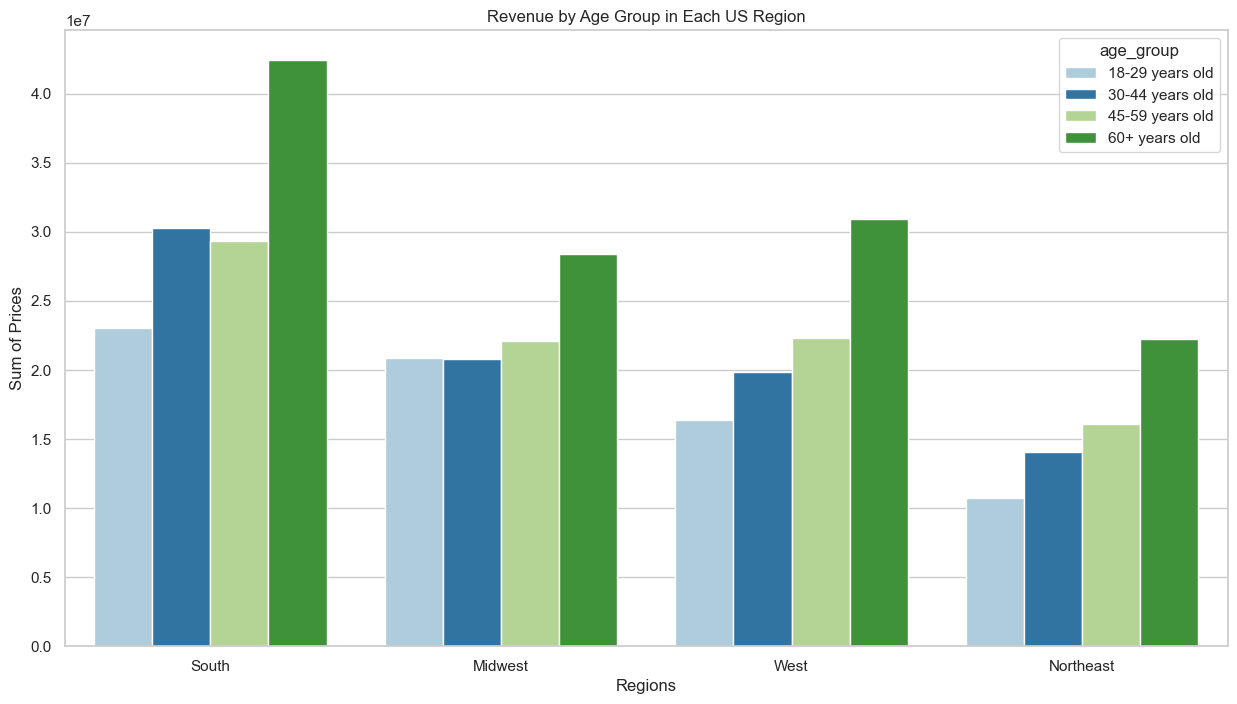

In [173]:
# Bar chart for revenue divided by age group in each US region 

sns.set(style="whitegrid")

plt.figure(figsize=(15, 8)) 

hue_order= ['18-29 years old', '30-44 years old', '45-59 years old', '60+ years old ']

# Create a bar plot using seaborn with the sum of prices on the y-axis
sns.barplot(x='Region', y='prices', hue='age_group', hue_order=hue_order, data=df2, ci=None, dodge=True, palette='Paired', saturation=0.75, estimator=sum)

# Add labels and title
plt.xlabel('Regions')
plt.ylabel('Sum of Prices')
plt.title('Revenue by Age Group in Each US Region')

path = r'/Users/miguel/Documents/Instacart Basket Analysis'

# Exporting the plot as a PNG file
plt.savefig(path + 'bar_revenue_age_region.png')

# Show the plot
plt.show()

In [87]:
df4 = df2[['Region', 'family_status', 'prices']]
df4

,Region,family_status,prices
0,South,Married_kids,9.0
1,South,Married_kids,9.0
2,South,Married_kids,9.0
3,South,Married_kids,9.0
4,South,Married_kids,9.0
...,...,...,...
30992659,South,Married_kids,6.1
30992660,South,Married_kids,6.1
30992661,South,Married_kids,6.1
30992662,South,Married_kids,6.1


/var/folders/dr/00kxp8917rb28j9sc7qrmsqh0000gn/T/ipykernel_93506/3189364049.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region', y='prices', hue='family_status', data=df4, ci=None, dodge=True, palette='Paired', saturation=0.75, width=0.6, estimator=sum)
/Users/miguel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/miguel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/miguel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be r

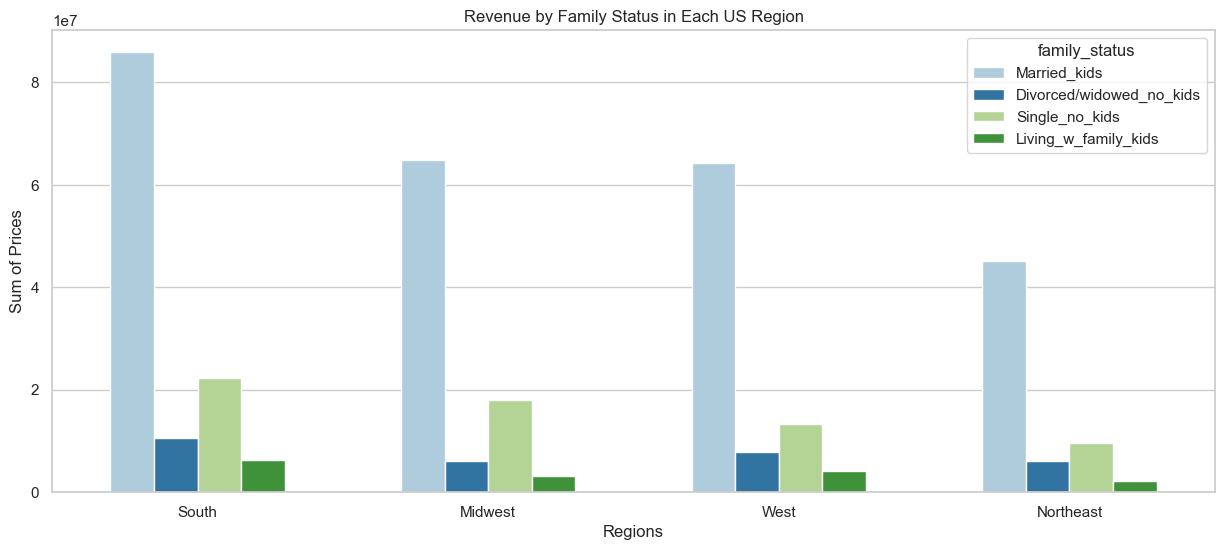

In [133]:
# Bar chart for money spent per region divided by family status

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a bar plot using seaborn
plt.figure(figsize=(15, 6))
sns.barplot(x='Region', y='prices', hue='family_status', data=df4, ci=None, dodge=True, palette='Paired', saturation=0.75, width=0.6, estimator=sum)

# Add labels and title
plt.xlabel('Regions')
plt.ylabel('Sum of Prices')
plt.title('Revenue by Family Status in Each US Region')

path = r'/Users/miguel/Documents/Instacart Basket Analysis'

# Exporting the plot as a PNG file
plt.savefig(path + 'bar_revenue_famstatus_region.png')

# Show the plot
plt.show()

In [89]:
df5 = df2[['Region', 'income_group', 'prices']]
df5

,Region,income_group,prices
0,South,lower_income,9.0
1,South,lower_income,9.0
2,South,lower_income,9.0
3,South,lower_income,9.0
4,South,lower_income,9.0
...,...,...,...
30992659,South,higher_income,6.1
30992660,South,higher_income,6.1
30992661,South,higher_income,6.1
30992662,South,higher_income,6.1


/var/folders/dr/00kxp8917rb28j9sc7qrmsqh0000gn/T/ipykernel_93506/708112550.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region', y='prices', hue='income_group', data=df5, ci=None, dodge=True, palette='Paired', saturation=0.75, width=0.6, estimator=sum)
/Users/miguel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/miguel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/miguel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be rem

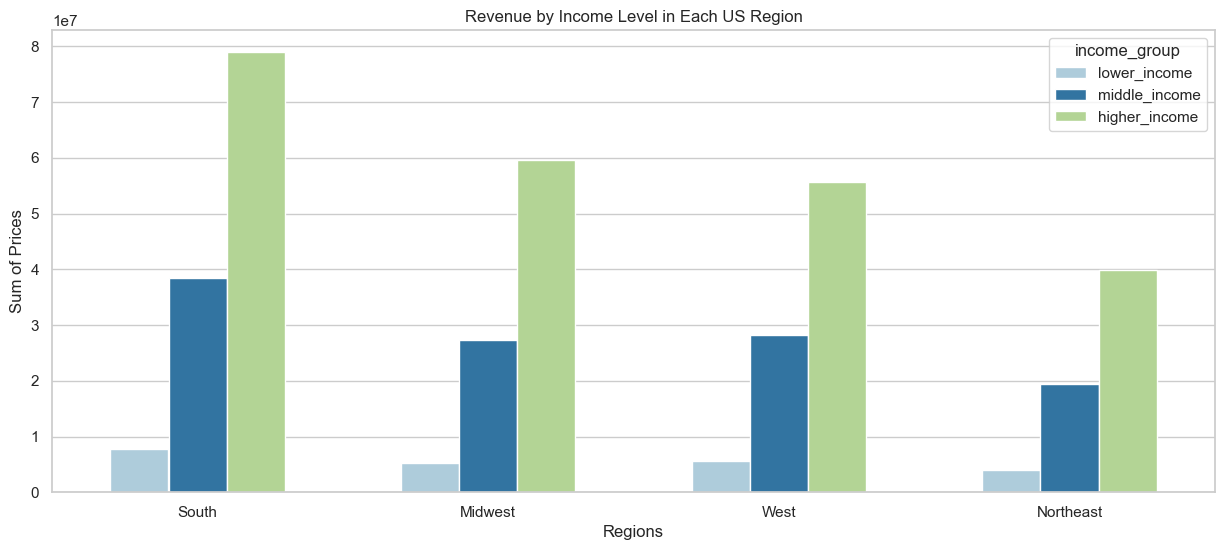

In [132]:
# Bar chart for money spent per region divided by income level

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a bar plot using seaborn
plt.figure(figsize=(15, 6))
sns.barplot(x='Region', y='prices', hue='income_group', data=df5, ci=None, dodge=True, palette='Paired', saturation=0.75, width=0.6, estimator=sum)

# Add labels and title
plt.xlabel('Regions')
plt.ylabel('Sum of Prices')
plt.title('Revenue by Income Level in Each US Region')

path = r'/Users/miguel/Documents/Instacart Basket Analysis'

# Exporting the plot as a PNG file
plt.savefig(path + 'bar_revenue_income_region.png')

# Show the plot
plt.show()

/var/folders/dr/00kxp8917rb28j9sc7qrmsqh0000gn/T/ipykernel_93506/588378949.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='department', y='prices', data=df2, ci=None, dodge=True, palette='Paired', saturation=0.75, width=0.6, estimator=sum)
/Users/miguel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/miguel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/miguel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future

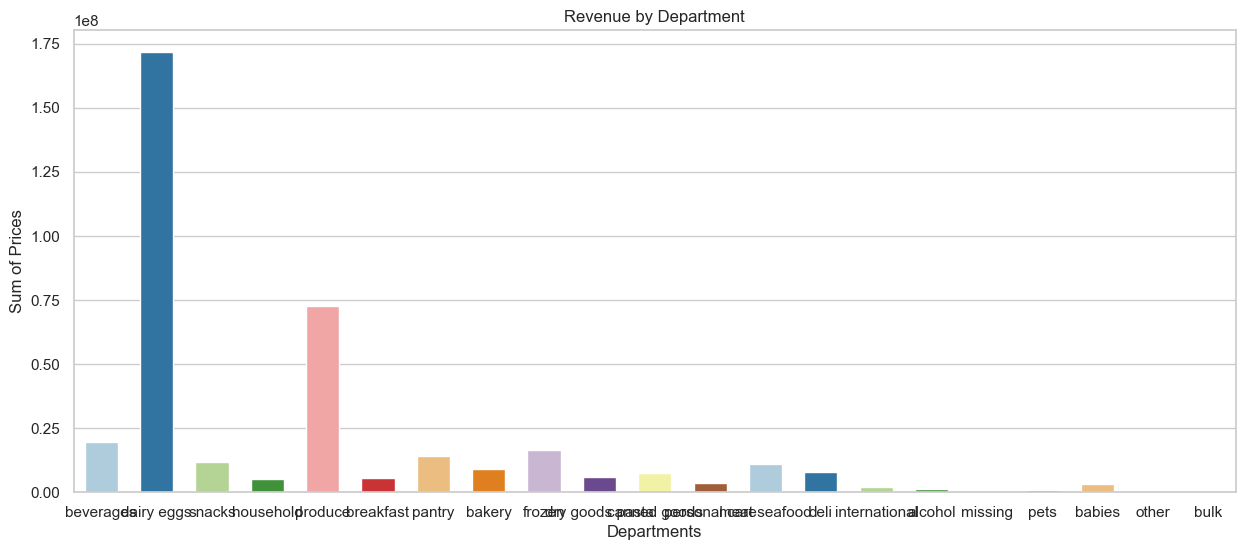

In [169]:
# Bar chart for revenue by department

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a bar plot using seaborn
plt.figure(figsize=(15, 6))
sns.barplot(x='department', y='prices', data=df2, ci=None, dodge=True, palette='Paired', saturation=0.75, width=0.6, estimator=sum)

# Add labels and title
plt.xlabel('Departments')
plt.ylabel('Sum of Prices')
plt.title('Revenue by Department')

path = r'/Users/miguel/Documents/Instacart Basket Analysis'

# Exporting the plot as a PNG file
plt.savefig(path + 'bar_revenue_department.png', bbox_inches='tight')

# Show the plot
plt.show()

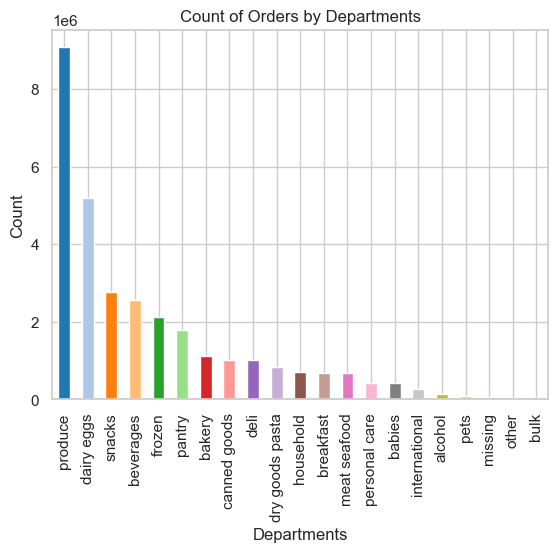

In [151]:
# Bar chart for order frequency by department

# Get the value counts for 'Department'
department_counts = df2['department'].value_counts()

# Set the style of seaborn
sns.set(style="whitegrid")

# Generate 20 colors from the 'tab20' color palette
colors = sns.color_palette('tab20', 21)

# Plot the bar chart with custom colors
bar_orders_department = department_counts.plot.bar(color=colors)

# Add labels and title
plt.xlabel('Departments')
plt.ylabel('Count')
plt.title('Count of Orders by Departments')

path = r'/Users/miguel/Documents/Instacart Basket Analysis'

# Exporting the plot as a PNG file
plt.savefig(path + 'bar_department_orders.png', bbox_inches='tight')

# Show the plot
plt.show()

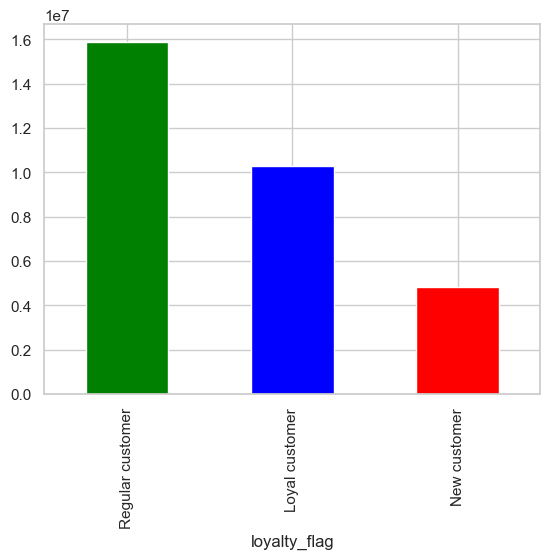

In [99]:
# Bar chart for number of customers by loyalty flag
bar_customers_loyalty = df2['loyalty_flag'].value_counts().plot.bar(color =['green', 'blue', 'red'])

In [167]:
# Exporting bar chart for number of customers by loyalty level
bar_customers_loyalty.figure.savefig(path + 'bar_customers_loyalty.png', bbox_inches='tight')

In [96]:
df6 = df2[['Region', 'loyalty_flag', 'prices']]
df6

,Region,loyalty_flag,prices
0,South,New customer,9.0
1,South,New customer,9.0
2,South,New customer,9.0
3,South,New customer,9.0
4,South,New customer,9.0
...,...,...,...
30992659,South,Regular customer,6.1
30992660,South,Regular customer,6.1
30992661,South,Regular customer,6.1
30992662,South,Regular customer,6.1


/var/folders/dr/00kxp8917rb28j9sc7qrmsqh0000gn/T/ipykernel_93506/3773291235.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region', y='prices', hue='loyalty_flag', data=df6, ci=None, dodge=True, palette='Paired', saturation=0.75, width=0.6, estimator=sum)
/Users/miguel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/miguel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/miguel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be re

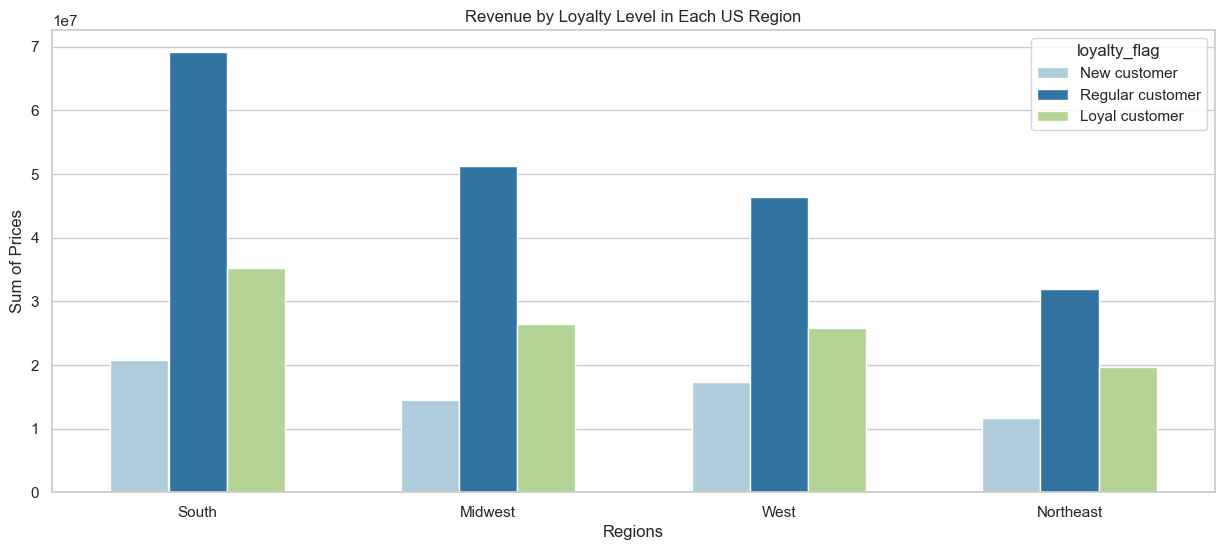

In [130]:
# Bar chart for money spent per region divided by loyalty level of customers

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a bar plot using seaborn
plt.figure(figsize=(15, 6))
sns.barplot(x='Region', y='prices', hue='loyalty_flag', data=df6, ci=None, dodge=True, palette='Paired', saturation=0.75, width=0.6, estimator=sum)

# Add labels and title
plt.xlabel('Regions')
plt.ylabel('Sum of Prices')
plt.title('Revenue by Loyalty Level in Each US Region')

path = r'/Users/miguel/Documents/Instacart Basket Analysis'

# Exporting the plot as a PNG file
plt.savefig(path + 'bar_revenue_loyalty_region.png')

# Show the plot
plt.show()

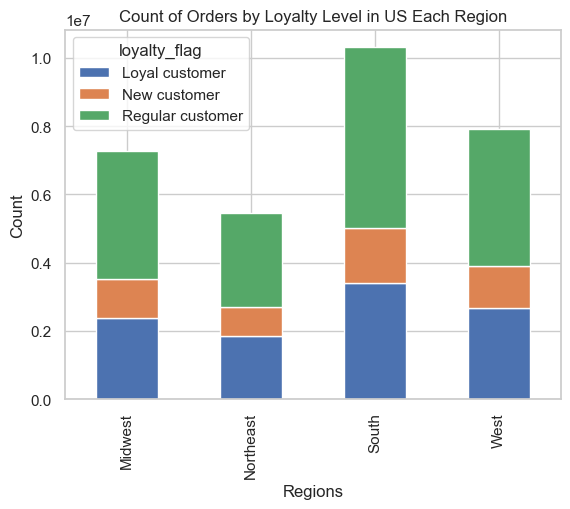

In [152]:
# Bar chart for order frequency by loyalty level in each region

# Group by 'regions' and 'loyalty_flag' and count occurrences

grouped_df = df2.groupby(['Region', 'loyalty_flag']).size().unstack(fill_value=0)

# Plotting
fig, ax = plt.subplots()
grouped_df.plot(kind='bar', stacked=True, ax=ax)

# Adding labels and title
plt.xlabel('Regions')
plt.ylabel('Count')
plt.title('Count of Orders by Loyalty Level in US Each Region')

path = r'/Users/miguel/Documents/Instacart Basket Analysis'

# Exporting the plot as a PNG file
plt.savefig(path + 'bar_orders_loyalty_region.png', bbox_inches='tight')

# Show the plot
plt.show()

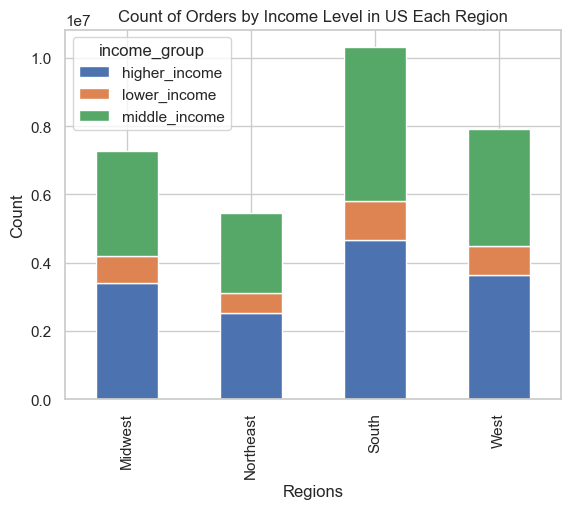

In [153]:
# Bar chart for order frequency by income level in each region

# Group by 'regions' and 'income_group' and count occurrences

grouped_df2 = df2.groupby(['Region', 'income_group']).size().unstack(fill_value=0)

# Plotting
fig, ax = plt.subplots()
grouped_df2.plot(kind='bar', stacked=True, ax=ax)

# Adding labels and title
plt.xlabel('Regions')
plt.ylabel('Count')
plt.title('Count of Orders by Income Level in US Each Region')

path = r'/Users/miguel/Documents/Instacart Basket Analysis'

# Exporting the plot as a PNG file
plt.savefig(path + 'bar_orders_income_region.png', bbox_inches='tight')

# Show the plot
plt.show()

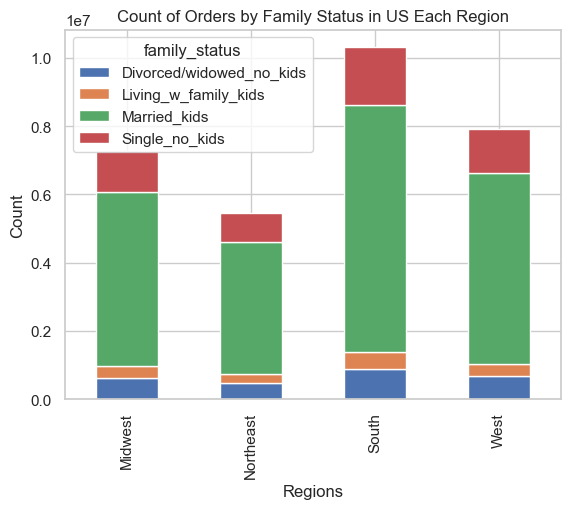

In [159]:
# Bar chart for order frequency by family status in each region

# Group by 'regions' and 'family_status' and count occurrences

grouped_df3 = df2.groupby(['Region', 'family_status']).size().unstack(fill_value=0)

# Plotting
fig, ax = plt.subplots()
grouped_df3.plot(kind='bar', stacked=True, ax=ax)

# Adding labels and title
plt.xlabel('Regions')
plt.ylabel('Count')
plt.title('Count of Orders by Family Status in US Each Region')

path = r'/Users/miguel/Documents/Instacart Basket Analysis'

# Exporting the plot as a PNG file
plt.savefig(path + 'bar_orders_fam_status_region.png', bbox_inches='tight')

# Show the plot
plt.show()

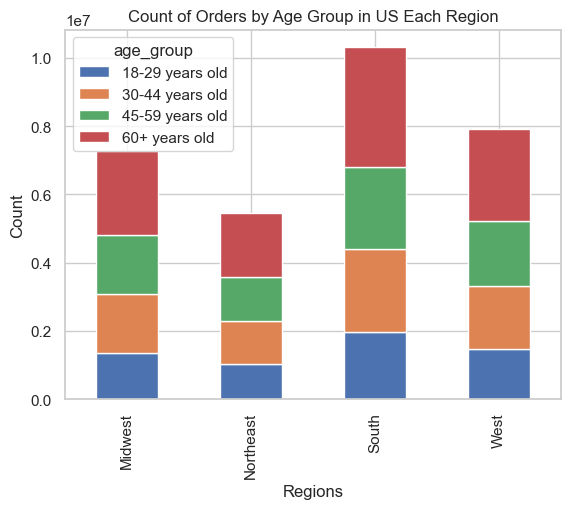

In [156]:
# Bar chart for order frequency by age group in each region

# Group by 'regions' and 'age_group' and count occurrences

grouped_df4 = df2.groupby(['Region', 'age_group']).size().unstack(fill_value=0)

# Plotting
fig, ax = plt.subplots()
grouped_df4.plot(kind='bar', stacked=True, ax=ax)

# Adding labels and title
plt.xlabel('Regions')
plt.ylabel('Count')
plt.title('Count of Orders by Age Group in US Each Region')

path = r'/Users/miguel/Documents/Instacart Basket Analysis'

# Exporting the plot as a PNG file
plt.savefig(path + 'bar_orders_age_region.png', bbox_inches='tight')

# Show the plot
plt.show()

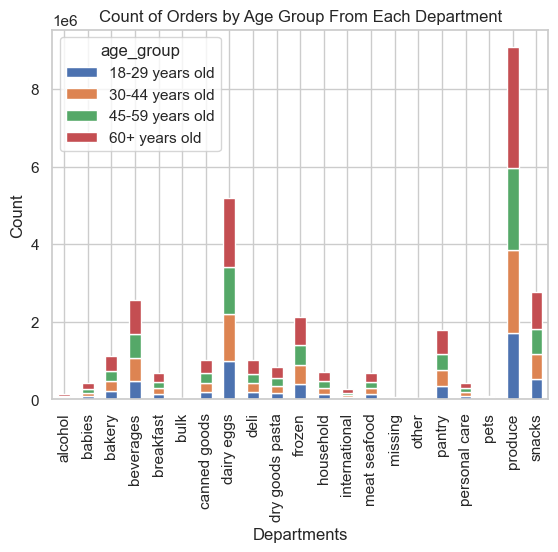

In [157]:
# Bar chart for order frequency by age group from each department

# Group by 'department' and 'age_group' and count occurrences

grouped_df5 = df2.groupby(['department', 'age_group']).size().unstack(fill_value=0)

# Plotting
fig, ax = plt.subplots()
grouped_df5.plot(kind='bar', stacked=True, ax=ax)

# Adding labels and title
plt.xlabel('Departments')
plt.ylabel('Count')
plt.title('Count of Orders by Age Group From Each Department')

path = r'/Users/miguel/Documents/Instacart Basket Analysis'

# Exporting the plot as a PNG file
plt.savefig(path + 'bar_orders_age_department.png', bbox_inches='tight')

# Show the plot
plt.show()

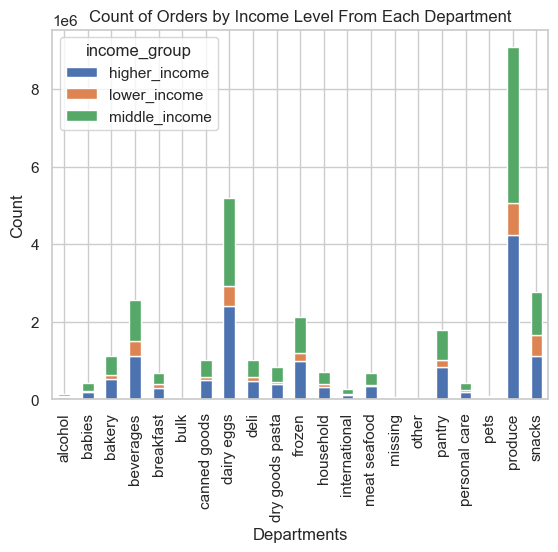

In [155]:
# Bar chart for order frequency by income level from each department

# Group by 'department' and 'income_group' and count occurrences

grouped_df6 = df2.groupby(['department', 'income_group']).size().unstack(fill_value=0)

# Plotting
fig, ax = plt.subplots()
grouped_df6.plot(kind='bar', stacked=True, ax=ax)

# Adding labels and title
plt.xlabel('Departments')
plt.ylabel('Count')
plt.title('Count of Orders by Income Level From Each Department')

path = r'/Users/miguel/Documents/Instacart Basket Analysis'

# Exporting the plot as a PNG file
plt.savefig(path + 'bar_orders_income_department.png', bbox_inches='tight')

# Show the plot
plt.show()

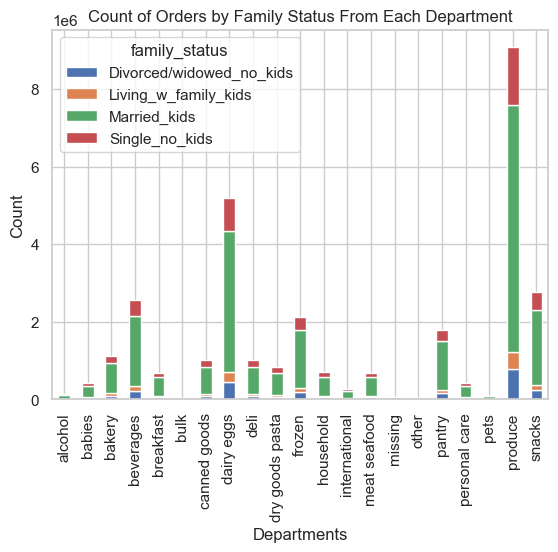

In [158]:
# Bar chart for order frequency by family status from each department

# Group by 'department' and 'family_status' and count occurrences

grouped_df7 = df2.groupby(['department', 'family_status']).size().unstack(fill_value=0)

# Plotting
fig, ax = plt.subplots()
grouped_df7.plot(kind='bar', stacked=True, ax=ax)

# Adding labels and title
plt.xlabel('Departments')
plt.ylabel('Count')
plt.title('Count of Orders by Family Status From Each Department')

path = r'/Users/miguel/Documents/Instacart Basket Analysis'

# Exporting the plot as a PNG file
plt.savefig(path + 'bar_orders_fam_status_department.png', bbox_inches='tight')

# Show the plot
plt.show()

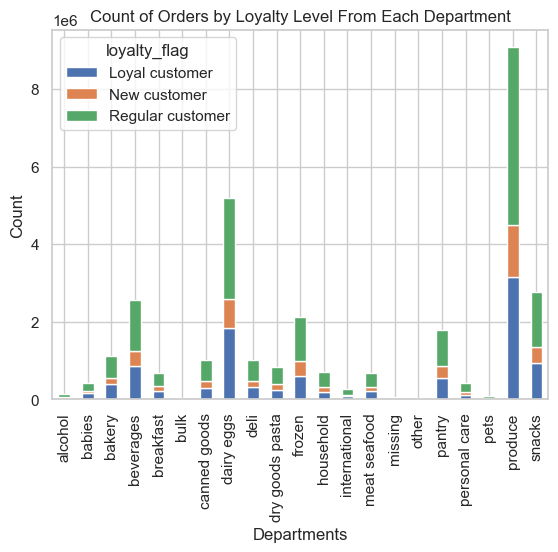

In [154]:
# Bar chart for order frequency by loyalty level from each department

# Group by 'department' and 'loyalty_flag' and count occurrences

grouped_df8 = df2.groupby(['department', 'loyalty_flag']).size().unstack(fill_value=0)

# Plotting
fig, ax = plt.subplots()
grouped_df8.plot(kind='bar', stacked=True, ax=ax)

# Adding labels and title
plt.xlabel('Departments')
plt.ylabel('Count')
plt.title('Count of Orders by Loyalty Level From Each Department')

path = r'/Users/miguel/Documents/Instacart Basket Analysis'

# Exporting the plot as a PNG file
plt.savefig(path + 'bar_orders_loyalty_department.png', bbox_inches='tight')

# Show the plot
plt.show()

In [113]:
#7: Aggregated data for loyalty_flag
df2.groupby('loyalty_flag').agg({'max_order': ['mean','max','min'], 'prices': ['sum','mean','max','min']})

max_order               prices                         
                       mean max min          sum       mean      max  min
loyalty_flag                                                             
Loyal customer    63.979888  99  41  106939028.9  10.388747  99999.0  1.0
New customer       7.490036  10   5   64364328.8  13.387341  99999.0  1.0
Regular customer  23.430697  40  11  198578123.1  12.496203  99999.0  1.0

In [114]:
#7: Aggregated data for family_status
df2.groupby('family_status').agg({'max_order': ['mean','max','min'], 'prices': ['sum','mean','max','min']})

max_order               prices                      \
                               mean max min          sum       mean      max   
family_status                                                                  
Divorced/widowed_no_kids  34.710415  99   5   30539845.2  11.534215  99999.0   
Living_w_family_kids      34.854308  99   5   16149166.0  10.892382  99999.0   
Married_kids              34.306881  99   5  259966229.8  11.945319  99999.0   
Single_no_kids            34.659950  99   5   63226239.8  12.399074  99999.0   

                               
                          min  
family_status                  
Divorced/widowed_no_kids  1.0  
Living_w_family_kids      1.0  
Married_kids              1.0  
Single_no_kids            1.0

In [115]:
#7: Aggregated data for income_group 
df2.groupby('income_group').agg({'max_order': ['mean','max','min'], 'prices': ['sum','mean','max','min']})

max_order               prices                         
                    mean max min          sum       mean      max  min
income_group                                                          
higher_income  34.578605  99   5  234029952.8  16.458909  99999.0  1.0
lower_income   32.383773  99   5   22597458.9   6.713149     25.0  1.0
middle_income  34.776045  99   5  113254069.1   8.447087  99999.0  1.0

In [116]:
#7: Aggregated data for age_group 
df2.groupby('age_group').agg({'max_order': ['mean','max','min'], 'prices': ['sum','mean','max','min']})

max_order               prices                         
                      mean max min          sum       mean      max  min
age_group                                                               
18-29 years old  34.380681  99   5   71037134.8  12.199361  99999.0  1.0
30-44 years old  34.519644  99   5   84903360.1  11.682374  99999.0  1.0
45-59 years old  34.470829  99   5   89837237.2  12.276107  99999.0  1.0
60+ years old    34.354564  99   5  124103748.7  11.725665  99999.0  1.0

In [117]:
#10: Exporting final dataframe
df2.to_pickle(os.path.join(path,'02 Data', 'Prepared Data','instacart_final.pkl'))